## NetworkX

Import just for fun

_Suschevskiy Vsevolod_

In [2]:
import networkx as nx
%matplotlib inline

In [4]:
g = nx.Graph()
g

create empty graph

In [6]:
print(g.nodes())

[]


print all nodes of empty graph

In [11]:
g.add_node(1)
g.add_nodes_from([2,3])
print(g.nodes())
g.add_nodes_from(range(4,11,1))
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


add __nodes__ and print them

In [34]:
g_new = nx.Graph()
import math
g_new.add_node(math.cos)
g_new.add_node('x')
print(g_new.nodes())

[<built-in function cos>, 'x']


Nodes could be different _WOW!!_

In [13]:
g.add_edge(1,2)
g.add_edges_from([(2,3),(3,4)])
for i in range(4,10,1):
 g.add_edge(i,i+1)
print(g.edges())


[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]


adding edges from cycle, what for? and How?

In [21]:
g.number_of_nodes()
g.number_of_edges()

9

Long sausage graph

In [22]:
g[1][2]['weight'] = 1.0 # edge already present
g[1][2]
for i in range(2,10,1):
 g[i][i+1]['weight'] = i*1.0
g.node[1]['name']='one'
g.node[1]
{'name':'one'}

{'name': 'one'}

add attribute weight to edges

In [25]:
names = ['one','two','three','four','five','six','seven','eight','nine','ten']
for node in g.nodes():
 g.node[node]['name'] = names[node-1]

Add names(labels) to nodes

In [26]:
for u,v in g.edges():
 print(u,v, g[u][v]['weight'])

1 2 1.0
2 3 2.0
3 4 3.0
4 5 4.0
5 6 5.0
6 7 6.0
7 8 7.0
8 9 8.0
9 10 9.0


Each link have N+1 weight as a previous one

In [27]:
mg = nx.MultiGraph()
>>> mg.add_nodes_from(['A','B','C','D'])
>>> mg.add_edge('A','C','b1')
>>> mg.add_edge('A','C','b2')
>>> mg.add_edge('A','D','b4')
>>> mg.add_edge('A','D','b5')
>>> mg.add_edge('A','B','b7')
>>> mg.add_edge('C','B','b3')
>>> mg.add_edge('D','B','b6')

'b6'

new graph for bridges in the Ken

In [28]:
>>> nx.is_eulerian(mg)

False

this problem could not be solved. PROVED

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


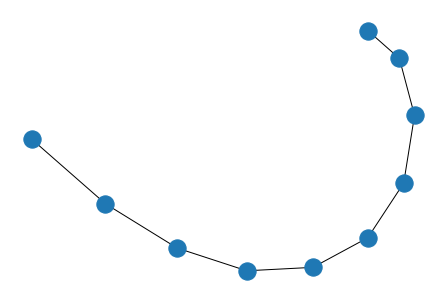

In [29]:
>>> nx.draw(g)

In [ ]:
Old method to draw

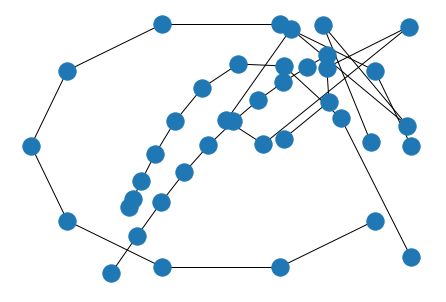

In [33]:
>>> nx.draw_random(g)
>>> nx.draw_circular(g)
>>> nx.draw_spectral(g)
>>> nx.draw_spring(g)


Why all of them printed at the same place, why not different plots?

### Slides

In [3]:
G = nx.Graph()
G.add_node(1)
G.add_edge(1, 2)

In [4]:
G = nx.path_graph(4)
nx.write_graphml(G, "fourpath.graphml")

In [5]:
G = nx.path_graph(4)
nx.write_gml(G, 'test.gml')
H = nx.read_gml('test.gml')

I have tried to save a network, NICE

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


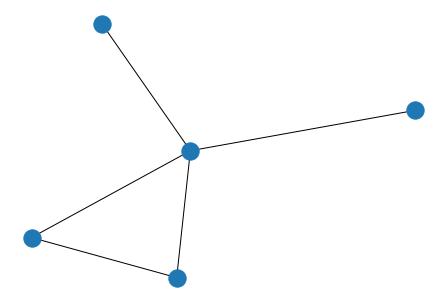

In [6]:
G = nx.Graph()
G.add_edge("Ann", "Harry")
G.add_edge("Ann", "Sarah")
G.add_edge("Ann", "John")
G.add_edge("Ann", "Maria")
G.add_edge("Maria", "Sarah")
nx.draw(G)

Network around one node

In [ ]:
G.remove_node("Ann")
nx.draw(G)

No center, no connections

In [9]:
for k in nx.connected_components(G):
 print(k)

{'Harry'}
{'Sarah', 'Maria'}
{'John'}


Only sarah and Mariad are connected

In [10]:
nx.closeness_centrality(G)

{'Harry': 0.0,
 'Sarah': 0.3333333333333333,
 'John': 0.0,
 'Maria': 0.3333333333333333}

Cebtrality metrics, clould be usefull

In [ ]:
nx.betweenness_centrality(G)

Betweenness is cooler than c.c.

In [11]:
pr = nx.pagerank(G, alpha=0.9)
pr


{'Harry': 0.045455123803631155,
 'Sarah': 0.45454487619636885,
 'John': 0.045455123803631155,
 'Maria': 0.45454487619636885}

Same as google

In [12]:
nx.clustering(G)

{'Harry': 0, 'Sarah': 0, 'John': 0, 'Maria': 0}

No clusters, since i have deleted  central node

In [21]:
G = nx.Graph()
G.add_edge("Ann", "Harry", weight=1)
G.add_edge("Ann", "Sarah", weight=2)
G.add_edge("Ann", "John", weight=1)
G.add_edge("Ann", "Maria", weight=1)
G.add_edge("Maria", "Sarah", weight=3)

weight again

In [22]:
G.node['Ann']['lang'] = 'French'
G.node['John']['lang'] = 'French'
G.node['Harry']['lang'] = 'French'
G.node['Sarah']['lang'] = 'English'
G.node['Maria']['lang'] = 'English'

attributes

In [13]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

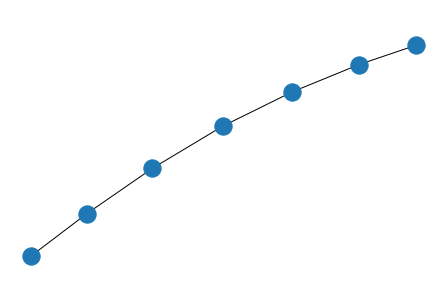

In [17]:
nx.draw(B)

Again

In [18]:
from networkx.algorithms import bipartite
bottom_nodes, top_nodes = bipartite.sets(B)
GTop = bipartite.projected_graph(B, top_nodes)
GBottom = bipartite.projected_graph(B, bottom_nodes)

ok

In [23]:
nx.degree_assortativity_coefficient(G)
nx.attribute_assortativity_coefficient(G, lang)

NameError: name 'lang' is not defined

I don't why it isn't working

In [ ]:
G.node['Ann']['lang'] = 'French'
G.node['John']['lang'] = 'French'
G.node['Harry']['lang'] = 'French'
G.node['Sarah']['lang'] = 'English'
G.node['Maria']['lang'] = 'English'
nx.attribute_assortativity_coefficient(G, 'lang')

oh, quote marks... really

In [ ]:
print("FIN")